In [100]:
import mlrose_hiive as mlrose
import numpy as np
import time

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



In [101]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/santus444/temp/master/Placement_Data_Full_Class.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data_cleaned = data



# import pandas as pd
# import io
# import requests
# url="https://raw.githubusercontent.com/santus444/temp/master/weatherAUS.csv"
# s=requests.get(url).content
# data=pd.read_csv(io.StringIO(s.decode('utf-8')))
# data_cleaned = data

In [102]:
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [103]:
# data_with_targets = data.dropna(subset=['RainToday', 'RainTomorrow'])
# data_filled = data_with_targets.ffill().bfill()
# data_filled[show_missing(data_filled)].isnull().sum()
# data_filled['WindGustDir'] = data_filled['WindGustDir'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
# data_filled['WindDir9am'] = data_filled['WindDir9am'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
# data_no_na = data.dropna(axis=0, how='any')
# data_no_na['WindGustDir'] = data_no_na['WindGustDir'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
# data_no_na['WindDir9am'] = data_no_na['WindDir9am'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
# data_no_na['WindDir3pm'] = data_no_na['WindDir3pm'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
# data_no_na['RainToday'] = data_no_na['RainToday'].map({'No':0, 'Yes':1})
# data_no_na['RainTomorrow'] = data_no_na['RainTomorrow'].map({'No':0, 'Yes':1})
# data_no_na['Location'] = data_no_na['Location'].map({'AliceSprings':1, 'Brisbane':2, 'Cairns':3, 'Canberra':4, 'Cobar':5, 'CoffsHarbour':6, 'Darwin':7, 'Hobart':8, 'Melbourne':9,'MelbourneAirport':10, 'Mildura':11, 'Moree':12, 'MountGambier':13,'NorfolkIsland':14, 'Nuriootpa':15, 'Perth':16, 'PerthAirport':17, 'Portland':18,'Sale':19, 'Sydney':20, 'SydneyAirport':21, 'Townsville':22, 'WaggaWagga':23,'Watsonia':24, 'Williamtown':25, 'Woomera':26})
# data_no_na.head()



In [104]:
data_cleaned.workex = data_cleaned.workex.map({'No':0, 'Yes':1})
data_cleaned.gender = data_cleaned.gender.map({"F":0, "M":1})
data_cleaned.ssc_b = data_cleaned.ssc_b.map({"Others":0, "Central":1})
data_cleaned.hsc_b = data_cleaned.hsc_b.map({'Others':0, 'Central':1})
data_cleaned.hsc_s = data_cleaned.hsc_s.map({'Commerce':0, 'Arts':1, 'Science':2})
data_cleaned.degree_t = data_cleaned.degree_t.map({'Others':0, 'Comm&Mgmt':1, 'Sci&Tech':2})
data_cleaned.specialisation = data_cleaned.specialisation.map({'Mkt&Fin':0, 'Mkt&HR':1})
data_cleaned.status = data_cleaned.status.map({'Not Placed':0, 'Placed':1})
data_cleaned.head()

data_no_na = data_cleaned.drop(labels='salary', axis=1) 
data_no_na = data_no_na.drop(labels='sl_no', axis=1) 
data_no_na.head

<bound method NDFrame.head of      gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      0  91.00      0      0     58.00         2       0   
1         1  79.33      1  78.33      0      2     77.48         2       1   
2         1  65.00      1  68.00      1      1     64.00         1       0   
3         1  56.00      1  52.00      1      2     52.00         2       0   
4         1  85.80      1  73.60      1      0     73.30         1       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      0  82.00      0      0     77.60         1       0   
211       1  58.00      0  60.00      0      2     72.00         2       0   
212       1  67.00      0  67.00      0      0     73.00         1       1   
213       0  74.00      0  66.00      0      0     58.00         1       0   
214       1  62.00      1  58.00      0      2     53.00         1       0   

     etest_p  specialisation  mba

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_no_na, data_no_na["status"]):
    strat_train_set = data_no_na.iloc[train_index]
    strat_test_set = data_no_na.iloc[test_index]

# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(data_no_na, data_no_na["RainTomorrow"]):
#     strat_train_set = data_no_na.iloc[train_index]
#     strat_test_set = data_no_na.iloc[test_index]
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop("Location", axis=1,  inplace=True)
#     set_.drop("Date", axis=1,  inplace=True)    

In [106]:
strat_train_set

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
147,1,70.00,1,74.00,1,0,65.00,1,0,83.00,0,62.28,1
161,1,55.60,0,51.00,0,0,57.50,1,0,57.63,1,62.72,0
169,1,59.96,0,42.16,0,2,61.26,2,0,54.48,1,65.48,0
131,0,74.90,0,57.00,0,2,62.00,0,1,80.00,0,60.78,1
27,1,63.00,0,67.00,0,0,66.00,1,0,68.00,1,57.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,85.00,0,90.00,0,0,82.00,1,0,92.00,0,68.03,1
84,1,70.00,1,63.00,0,2,70.00,2,1,55.00,0,62.00,1
166,1,62.00,0,62.00,0,0,60.00,1,1,63.00,1,52.38,1
160,1,87.00,1,74.00,1,2,65.00,2,1,75.00,1,72.29,1


In [107]:
features = strat_train_set.columns[:-1]
target = strat_train_set.columns[-1]

In [108]:
X_train = strat_train_set[features]
Y_train = strat_train_set[target]
X_test = strat_test_set[features]
Y_test = strat_test_set[target]

In [143]:
def get_firness_scores(curve_data):
    return [row[0] for row in curve_data]

In [109]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
def plot_graphs2(title, y_values, y_axis_label='Iterations', fitness_scores = [], fitness_scores_labels =[], plt=plt):
    for fitness_score, fitness_scores_label, y_value in zip(fitness_scores, fitness_scores_labels, y_values):
        plt.plot(y_value, fitness_score, label = fitness_scores_label)
        plt.text(y_value[-1], fitness_score[-1], fitness_score[-1])    

    
def plot_builder(title, y_values, y_axis_label='Iterations', fitness_scores = [], fitness_scores_labels =[], plt=plt):
    plt.style.use('seaborn')
    plot_graphs2(title, y_values, y_axis_label, fitness_scores, fitness_scores_labels, plt)
    plt.ylabel('Fitness Score', fontsize = 14)
    plt.xlabel(y_axis_label, fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    max_fitness = 1
    for fitness_score in fitness_scores:
        if np.nanmax(fitness_score) > max_fitness:
            max_fitness = np.nanmax(fitness_score)
    ylim_max = max_fitness+(max_fitness*0.1)
    ylim_min = 0
    plt.ylim(ylim_min, ylim_max)
    return plt

In [110]:

def get_training_testing_score(nn_model, X_train_scaled=X_train_scaled, Y_train=Y_train,X_test_scaled=X_test_scaled,  Y_test=Y_test):
    y_train_pred = nn_model.predict(X_train_scaled)

    y_train_accuracy = accuracy_score(Y_train, y_train_pred)

    print("Training accuracy: "+str(y_train_accuracy))

    # Predict labels for test set and assess accuracy
    y_test_pred = nn_model.predict(X_test_scaled)

    y_test_accuracy = accuracy_score(Y_test, y_test_pred)

    print("Testing accuracy: "+str(y_test_accuracy))


Training accuracy: 0.5232558139534884
Testing accuracy: 0.6046511627906976


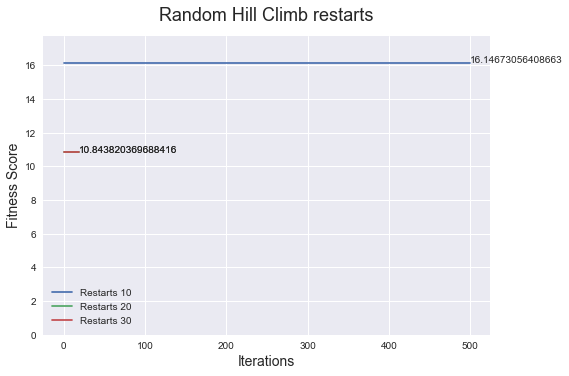

In [153]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [300, 400, 300], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 500, \
                                 bias = True, is_classifier = True, learning_rate = 0.000001, \
                                 early_stopping = True,  max_attempts = 20, \
                                 random_state = 1, curve=True, restarts=10)

xx = nn_model1.fit(X_train_scaled, Y_train)
get_training_testing_score(nn_model1)
nn_model1.fitness_curve

nn_model12 = mlrose.NeuralNetwork(hidden_nodes = [300, 400, 300], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 500, \
                                 bias = True, is_classifier = True, learning_rate = 0.000001, \
                                 early_stopping = True,  max_attempts = 20, \
                                 random_state = 1, curve=True, restarts=20)
nn_model12.fit(X_train_scaled, Y_train)
# get_training_testing_score(nn_model1)
nn_model12.fitness_curve


nn_model13 = mlrose.NeuralNetwork(hidden_nodes = [300, 400, 300], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 500, \
                                 bias = True, is_classifier = True, learning_rate = 0.000001, \
                                 early_stopping = True,  max_attempts = 20, \
                                 random_state = 1, curve=True, restarts=30)
nn_model13.fit(X_train_scaled, Y_train)
# get_training_testing_score(nn_model1)
nn_model13.fitness_curve

pltTemp = plot_builder("Random Hill Climb restarts", [ range(0, len(nn_model1.fitness_curve)), range(0, len(nn_model12.fitness_curve)), 
                                                            range(0, len(nn_model13.fitness_curve))], 'Iterations', 
                       [get_firness_scores(nn_model1.fitness_curve), get_firness_scores(nn_model12.fitness_curve), 
                        get_firness_scores(nn_model13.fitness_curve)],
                       [ 'Restarts 10', 
                        'Restarts 20',
                        'Restarts 30'])

In [156]:
get_training_testing_score(nn_model12)
get_training_testing_score(nn_model13)

Training accuracy: 0.686046511627907
Testing accuracy: 0.6976744186046512
Training accuracy: 0.686046511627907
Testing accuracy: 0.6976744186046512


In [155]:
print(nn_model1.fitted_weights)

[-0.16595599  0.44064899 -0.99977125 ...  0.33302448  0.43487011
 -0.98054785]


In [133]:
# nn_model1.fitness_curve

Training accuracy: 0.686046511627907
Testing accuracy: 0.6976744186046512


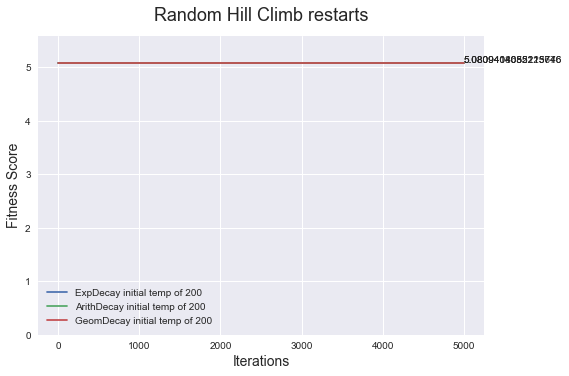

In [147]:
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [300, 400], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True,  max_attempts = 200, \
                                 random_state = 1, curve=True, schedule=mlrose.ExpDecay(init_temp=500))

nn_model2.fit(X_train_scaled, Y_train)
get_training_testing_score(nn_model2)
nn_model2.fitness_curve

nn_model22 = mlrose.NeuralNetwork(hidden_nodes = [300, 400], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True,  max_attempts = 200, \
                                 random_state = 1, curve=True, schedule=mlrose.ArithDecay(init_temp=500))

nn_model22.fit(X_train_scaled, Y_train)
# get_training_testing_score(nn_model22)
nn_model22.fitness_curve

nn_model23 = mlrose.NeuralNetwork(hidden_nodes = [300, 400], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True,  max_attempts = 200, \
                                 random_state = 1, curve=True, schedule=mlrose.GeomDecay(init_temp=500))

nn_model23.fit(X_train_scaled, Y_train)
# get_training_testing_score(nn_model22)
nn_model23.fitness_curve


pltTemp = plot_builder("SA Decay hyperparameters", [ range(0, len(nn_model2.fitness_curve)), range(0, len(nn_model22.fitness_curve)), 
                                                            range(0, len(nn_model23.fitness_curve))], 'Iterations', 
                       [get_firness_scores(nn_model2.fitness_curve), get_firness_scores(nn_model22.fitness_curve), 
                        get_firness_scores(nn_model23.fitness_curve)],
                       [ 'ExpDecay initial temp of 200', 
                        'ArithDecay initial temp of 200',
                        'GeomDecay initial temp of 200'])

In [157]:
get_training_testing_score(nn_model22)
get_training_testing_score(nn_model23)

Training accuracy: 0.686046511627907
Testing accuracy: 0.6976744186046512
Training accuracy: 0.686046511627907
Testing accuracy: 0.6976744186046512


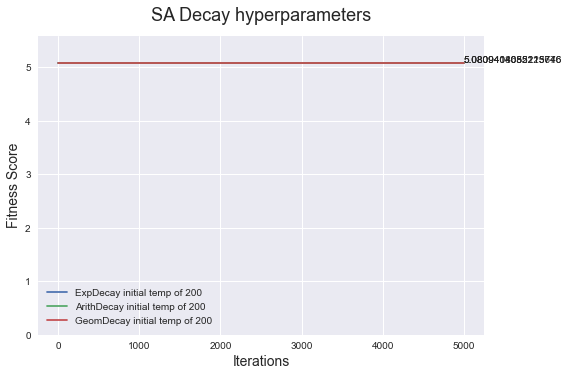

In [148]:

pltTemp = plot_builder("SA Decay hyperparameters", [ range(0, len(nn_model2.fitness_curve)), range(0, len(nn_model22.fitness_curve)), 
                                                            range(0, len(nn_model23.fitness_curve))], 'Iterations', 
                       [get_firness_scores(nn_model2.fitness_curve), get_firness_scores(nn_model22.fitness_curve), 
                        get_firness_scores(nn_model23.fitness_curve)],
                       [ 'ExpDecay initial temp of 200', 
                        'ArithDecay initial temp of 200',
                        'GeomDecay initial temp of 200'])

Training accuracy: 0.7209302325581395
Testing accuracy: 0.6976744186046512
Training accuracy: 0.7209302325581395
Testing accuracy: 0.5348837209302325
Training accuracy: 0.7383720930232558
Testing accuracy: 0.6744186046511628


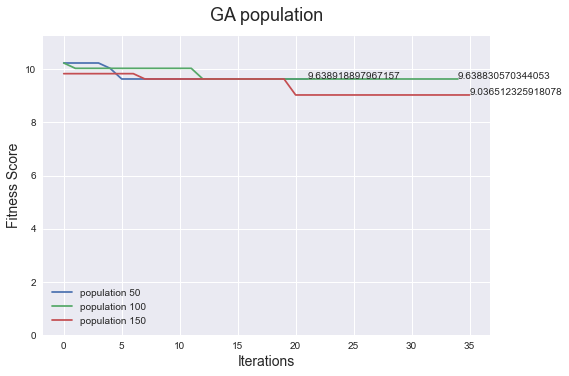

In [154]:
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [300, 400], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 200, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True,  max_attempts = 15, \
                                 random_state = 1, curve=True, pop_size=50)#, mutation_prob=0.2)

nn_model3.fit(X_train_scaled, Y_train)
get_training_testing_score(nn_model3)


nn_model32 = mlrose.NeuralNetwork(hidden_nodes = [300, 400], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 200, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True,  max_attempts = 15, \
                                 random_state = 1, curve=True, pop_size=100)#, mutation_prob=0.2)

nn_model32.fit(X_train_scaled, Y_train)
get_training_testing_score(nn_model32)

nn_model33 = mlrose.NeuralNetwork(hidden_nodes = [300, 400], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 200, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = True,  max_attempts = 15, \
                                 random_state = 1, curve=True, pop_size=150)#, mutation_prob=0.2)

nn_model33.fit(X_train_scaled, Y_train)
get_training_testing_score(nn_model33)


pltTemp = plot_builder("GA population", [ range(0, len(nn_model3.fitness_curve)), range(0, len(nn_model32.fitness_curve)), 
                                                            range(0, len(nn_model33.fitness_curve))], 'Iterations', 
                       [get_firness_scores(nn_model3.fitness_curve), get_firness_scores(nn_model32.fitness_curve), 
                        get_firness_scores(nn_model33.fitness_curve)],
                       [ 'population 50', 
                        'population 100',
                        'population 150'])

In [140]:
nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [300, 400], activation = 'sigmoid', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True,  max_attempts = 200, \
                                 random_state = 1, curve=True)

nn_model4.fit(X_train_scaled, Y_train)
get_training_testing_score(nn_model4)
nn_model4.fitness_curve

Training accuracy: 0.8837209302325582
Testing accuracy: 0.8604651162790697


array([-5.08103624, -4.43687152, -3.79424178, -3.15353106, -2.51706296,
       -1.90074803, -1.38777073, -1.14630213, -1.1052256 , -1.08949995,
       -1.07447253, -1.05975013, -1.04532594, -1.03119679, -1.01735943,
       -1.0038105 , -0.99054659, -0.97756417, -0.96485966, -0.9524294 ,
       -0.94026969, -0.92837677, -0.91674682, -0.90537601, -0.89426045,
       -0.88339622, -0.87277939, -0.862406  , -0.85227207, -0.8423736 ,
       -0.83270659, -0.82326703, -0.8140509 , -0.80505419, -0.79627287,
       -0.78770292, -0.77934034, -0.77118111, -0.76322123, -0.75545673,
       -0.74788362, -0.74049794, -0.73329575, -0.72627312, -0.71942615,
       -0.71275095, -0.70624366, -0.69990045, -0.69371752, -0.68769109,
       -0.68181742, -0.67609282, -0.6705136 , -0.66507614, -0.65977686,
       -0.65461221, -0.6495787 , -0.64467287, -0.63989132, -0.63523071,
       -0.63068774, -0.62625917, -0.62194181, -0.61773254, -0.61362828,
       -0.60962604, -0.60572286, -0.60191586, -0.59820221, -0.59